# Example usage of KCF-convoy for machine learning

* Importing existing libraries. The sklearn.ensemble library may show a future warning.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Libraries for machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

/opt/conda/envs/kcfconvoy/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


* Inporting libraries defined in kcfconvoy.

In [2]:
import kcfconvoy as kcf # KCF Convoy library
from kcfconvoy import Classifiers # a set of classifiers for machine learning

## Input compound structures in BRITE

* Input compound structures using KEGG BRITE https://www.genome.jp/kegg/brite.html 

Example file can be obtained by clicking the <b>[Download htext]</b> link in  https://www.genome.jp/kegg-bin/get_htext?ko01002.keg . KCF Convoy provides a method `.input_from_brite()` to input compounds from KEGG BRITE. RDKit may generate many warnings, which are because of the chemical structures defined in KEGG.

In [3]:
# Please download "br08007.keg" file by clicking "Download htext" link from https://www.genome.jp/kegg-bin/get_htext?br08007.keg
# and put it in the appropriate directory.
!date
brite = './kegg/br08007.keg'
kcfmat = kcf.KCFmat()
kcfmat.input_from_brite(brite)
!date

Mon Oct 15 07:23:29 UTC 2018


RDKit WARNING: [07:23:30]  S group MUL ignored on line 75
RDKit WARNING: [07:23:33] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:35] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:38] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:39] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:40] WARNING: Charges were rearranged
RDKit WARNING: [07:23:42] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:43] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:44] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:46] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:47] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:48] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:49] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:51] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:52] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:52] WARNING: Omitted undefined stereo
RDKit WARNING: [07:23:54] WARNING: Omitted 

RDKit WARNING: [07:27:41] WARNING: Proton(s) added/removed
RDKit WARNING: [07:27:42] WARNING: Proton(s) added/removed
RDKit WARNING: [07:27:44] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:44] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:47] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:52] WARNING: Charges were rearranged
RDKit WARNING: [07:27:52] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [07:27:52] WARNING: Charges were rearranged
RDKit WARNING: [07:27:53] WARNING: Charges were rearranged
RDKit WARNING: [07:27:53] WARNING: Charges were rearranged
RDKit WARNING: [07:27:55] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:55] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:57] WARNING: Omitted undefined stereo
RDKit WARNING: [07:27:58] WARNING: Omitted undefined stereo
RDKit WARNING: [07:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [07:28:01] WARNING: Omitted undefined stereo
RDKit WARNING: [07:28

RDKit ERROR: [07:33:55] Explicit valence for atom # 0 Si, 8, is greater than permitted


Mon Oct 15 07:34:36 UTC 2018


* Check the number of compounds by `.cpds`.
* Note that we only made the collection of independent KCF vectors at this moment. The KCF matrix will be calculated later.

In [4]:
len(kcfmat.cpds)

918

* Check the grouping of compounds defined in KEGG BRITE by `.brite_group`

In [5]:
kcfmat.brite_group

{'A:<b>Pesticides</b>': ['',
  '',
  '',
  'C18498',
  'C18723',
  'C18568',
  'C18568',
  'C18581',
  'C10929',
  'C18547',
  'C11255',
  'C10932',
  'C18573',
  'C18516',
  'C18820',
  'C18518',
  'C18833',
  'C18593',
  'C18519',
  'C18464',
  'C18521',
  'C18502',
  'C10941',
  'C18503',
  'C18522',
  'C18548',
  'C18626',
  'C18800',
  'C18753',
  'C10956',
  'C18480',
  'C18482',
  'C11182',
  'C18550',
  'C18899',
  'C10960',
  'C18903',
  'C18903',
  'C02010',
  'C17968',
  'C08073',
  'C06624',
  'C00413',
  'C12112',
  'C12112',
  'C10896',
  'C18415',
  'C10897',
  'C11077',
  'C18866',
  'C18421',
  'C18885',
  'C14432',
  'C14432',
  'C18701',
  'C18704',
  'C18459',
  'C18456',
  'C18720',
  'C18739',
  'C18461',
  'C18733',
  'C18734',
  'C18466',
  'C18468',
  'C18471',
  'C18476',
  'C18477',
  'C18572',
  'C18801',
  'C11121',
  'C18888',
  'C18544',
  'C18489',
  'C18490',
  'C11156',
  'C11127',
  'C18493',
  'C18815',
  'C18494',
  'C18494',
  'C18712',
  'C18713',

* Check the name of the compound groups defined in KEGG BRITE by `.list_brite_groups()`.

In [6]:
kcfmat.list_brite_groups()

[(0, 'A:<b>Obsolete pesticides</b>', 313),
 (1, 'A:<b>Pesticides</b>', 741),
 (2, 'B:Fungicides', 240),
 (3, 'B:Herbicides', 365),
 (4, 'B:Insect growth regulators', 30),
 (5, 'B:Insecticides', 299),
 (6, 'B:Others', 33),
 (7, 'B:Plant growth regulators', 51),
 (8, 'B:Rodenticides', 35),
 (9, 'C:Acaricides', 44),
 (11, 'C:Amide fungicides', 39),
 (12, 'C:Amide herbicides', 25),
 (13, 'C:Anilide herbicides', 26),
 (14, 'C:Antibiotic fungicides', 10),
 (18, 'C:Auxins', 11),
 (19, 'C:Benzoic acid herbicides', 15),
 (22, 'C:Carbamate fungicides', 12),
 (23, 'C:Carbamate insecticide', 11),
 (24, 'C:Carbamate insecticides', 25),
 (25, 'C:Carbanilate herbicides', 11),
 (26, 'C:Chitin synthesis inhibitors', 12),
 (27, 'C:Conazole fungicides', 31),
 (29, 'C:Coumarin rodenticides', 11),
 (32, 'C:Dicarboximide fungicides', 13),
 (33, 'C:Dinitroaniline herbicides', 13),
 (36, 'C:Dithiocarbamate fungicides', 14),
 (39, 'C:Growth inhibitors / retardants', 15),
 (45, 'C:Insect repellents', 11),
 (57,

## Classifying compounds into two groups 
* The users can classify compounds into two groups by specifiying the class shown above. KCF-convoy provides a method `.brite_class()` to give a binary classification describing whether or not a group belongs to the specified group. In the case provided below, `(3, 'B:Herbicides', 365)` is specified, and the user will deal with the classification of herbicides from others.

In [7]:
classes = kcfmat.brite_class(3)

* Check the classification results, which will be used as a training data

In [8]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Supervised binary classification using existing chemical fingerprints

* KCF Convoy provides `Classifiers` for a number of classifiers, and `.calc_fingerprints()` for a set of existing chemical fingerprints (defined in RDKit).

PatternFingerprint , length=  1024
Mon Oct 15 07:34:44 UTC 2018
Mon Oct 15 07:36:52 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Extra Tree,1.000000,0.000000,0.813043,0.018062
Multi-Layer Perceptron,1.000000,0.000000,0.807609,0.015731
Gaussian Process,1.000000,0.000000,0.805435,0.015276
Gradient Boosting,0.968909,0.008461,0.794293,0.020418
Random Forest,0.988182,0.005505,0.791848,0.022195
Logistic Regression,0.993636,0.004791,0.779891,0.013915
Nearest Neighbors,0.844545,0.014999,0.766576,0.016968
Linear SVM,0.999455,0.000878,0.757880,0.017350
AdaBoost,0.891455,0.007070,0.755707,0.010828


LayeredFingerprint , length=  2048
Mon Oct 15 07:37:13 UTC 2018
Mon Oct 15 07:40:35 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Extra Tree,0.999273,0.000939,0.830707,0.017473
Gaussian Process,0.999273,0.000939,0.830707,0.014831
Logistic Regression,0.997818,0.002235,0.829891,0.011684
Multi-Layer Perceptron,0.998909,0.001271,0.828804,0.014265
Gradient Boosting,0.978545,0.003716,0.820380,0.026047
Random Forest,0.987455,0.005518,0.808967,0.020934
Stochastic Gradient Descent,0.944545,0.020894,0.800543,0.020544
Linear SVM,0.999091,0.001286,0.799457,0.019545
Nearest Neighbors,0.852545,0.010121,0.793478,0.016304


RDKFingerprint , length=  2048
Mon Oct 15 07:40:59 UTC 2018
Mon Oct 15 07:44:36 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Gaussian Process,0.999273,0.000939,0.825543,0.019960
Multi-Layer Perceptron,0.999273,0.000939,0.813315,0.018343
Logistic Regression,0.999273,0.000939,0.812500,0.016604
Extra Tree,0.999273,0.000939,0.801087,0.022254
Gradient Boosting,0.987273,0.003534,0.800272,0.013692
Linear SVM,0.999273,0.000939,0.794837,0.013328
Random Forest,0.987091,0.006088,0.785326,0.019086
Nearest Neighbors,0.850909,0.010808,0.774185,0.019234
Stochastic Gradient Descent,0.944545,0.056447,0.772011,0.048954


MorganFingerprint , length=  2048
Mon Oct 15 07:44:53 UTC 2018
Mon Oct 15 07:47:58 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Gaussian Process,1.000000,0.000000,0.855435,0.013176
Logistic Regression,0.999091,0.001286,0.844837,0.022019
Multi-Layer Perceptron,1.000000,0.000000,0.842120,0.023462
Linear SVM,1.000000,0.000000,0.833967,0.019739
Extra Tree,1.000000,0.000000,0.826630,0.017508
Stochastic Gradient Descent,0.977636,0.021599,0.818207,0.027218
Random Forest,0.987636,0.004354,0.813315,0.016948
Nearest Neighbors,0.853273,0.017898,0.810870,0.014673
Gradient Boosting,0.954364,0.008241,0.803804,0.021196


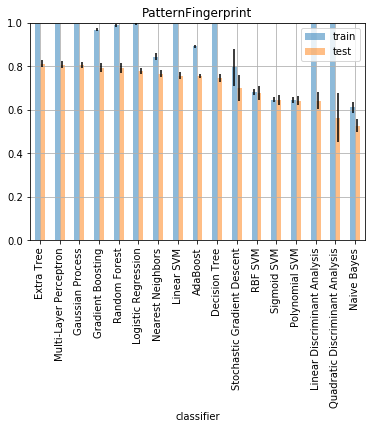

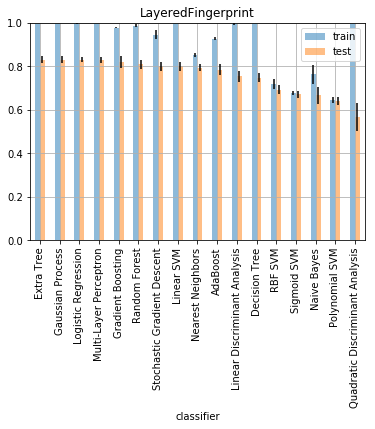

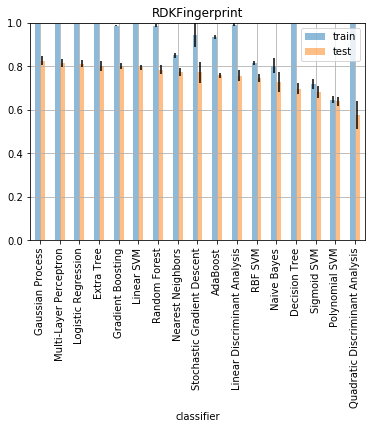

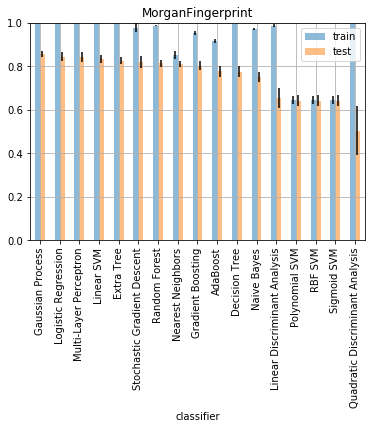

In [9]:
fingerprints = ["PatternFingerprint", "LayeredFingerprint", "RDKFingerprint", "MorganFingerprint"]
for fingerprint in fingerprints: # using the existing fingerprints in turn
    kcfmat.calc_fingerprints(fingerprint=fingerprint)
    X = kcfmat.fps_mat()
    y = classes
    print(fingerprint, ", length= ", len(X[0]))

    !date
    result = []
    for trial in range(10): # iterates 10 times
        clfs = Classifiers()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # generating training and test datasets
        for name, clf in clfs.classifiers: #  calling the defined classifiers in turn 
            try:
                clf.fit(X_train, y_train) #  learning
                score1 = clf.score(X_train, y_train) # calculating the accuracy score for the training data
                score2 = clf.score(X_test, y_test) # calculating the accuracy score for the test data
                result.append([name, score1, score2]) # storing the result
            except:
                continue

    df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # Preparing the result table
    !date
    # grouping the results by classifiers and calculating the average of the accuracy score, followed by sorting 
    df_result_mean = df_result.groupby('classifier').mean() #.sort_values('test', ascending=False)
    # calculating the standard deviations for the use of error bars 
    errors = df_result.groupby('classifier').std()
    errors.columns=['train_err', 'test_err']
    
    # depicting the bar charts
    display(pd.concat([df_result_mean['train'], errors['train_err'], df_result_mean['test'], errors['test_err']], axis=1).sort_values('test', ascending=False))
    df_result_mean = df_result_mean.sort_values('test', ascending=False)
    errors.columns=['train', 'test']
    df_result_mean.plot(title=fingerprint, kind='bar', alpha=0.5, grid=True, yerr=errors, ylim=[0, 1])

## Calculating the KCF matrix

* Before using `.calc_kcf_matrix()`, the users only have a set of independent KCF vectors.
* The method `.calc_kcf_matrix()` enables the users to obtain a KCF matrix.

In [10]:
!date
kcfmat.calc_kcf_matrix()
!date

Mon Oct 15 07:48:00 UTC 2018
Mon Oct 15 07:53:11 UTC 2018


* The naive KCF matrix `.all_mat` contains all possible chemical substructures, which yields a huge sparse matrix.

In [11]:
kcfmat.all_mat.shape

(918, 315558)

* The users can use the KCF matrix `.mat` in which rare chemical substructures (the observed frequency are lesser than the threshold) are removed.

In [12]:
kcfmat.mat.shape

(918, 37152)

## Selecting important features for the objective classification

* The original KCF matrix is still too huge. KCF Convoy provides the `.feature_selection()` method to select the important features for the classification of the user's objective. After the feature selection, the selected matrix can be accessed by `.selected_mat()`

In [23]:
!date
y = classes
kcfmat.feature_selection(y, classifier=RandomForestClassifier())
X = kcfmat.selected_mat()
!date

Mon Oct 15 08:02:00 UTC 2018
Mon Oct 15 08:02:25 UTC 2018


In [24]:
X.shape

(918, 2048)

## Supervised binary classification using KCF-S

* Notice that the predicive performance is better than the best results by the other existing chemical fingerprints.

Mon Oct 15 08:02:25 UTC 2018
KCF-S , length=  2048
Mon Oct 15 08:05:06 UTC 2018


,train,train_err,test,test_err
classifier,,,,
Multi-Layer Perceptron,0.996727,0.001434,0.851630,0.017480
Extra Tree,0.997273,0.001286,0.843750,0.017622
Gradient Boosting,0.971636,0.002600,0.839674,0.016604
Logistic Regression,0.995818,0.001497,0.834511,0.017160
Random Forest,0.986182,0.004552,0.825815,0.014909
Gaussian Process,0.997273,0.001286,0.825000,0.012166
AdaBoost,0.948364,0.010149,0.811685,0.015691
Linear SVM,0.996909,0.001227,0.802446,0.013680
Linear Discriminant Analysis,0.997091,0.000939,0.791576,0.027625


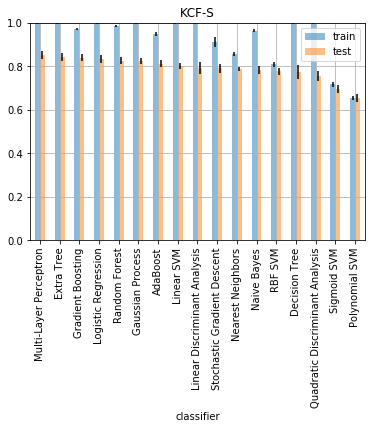

In [25]:
!date
print("KCF-S", ", length= ", len(X[0]))
result = []
for trial in range(10): # iterates 10 times
    clfs = Classifiers()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4) # generating training and test datasets
    for name, clf in clfs.classifiers: #  calling the defined classifiers in turn 
        try:
            clf.fit(X_train, y_train) #  learning
            score1 = clf.score(X_train, y_train) # calculating the accuracy score for the training data
            score2 = clf.score(X_test, y_test) # calculating the accuracy score for the test data
            result.append([name, score1, score2]) # storing the result
        except:
            continue

df_result = pd.DataFrame(result, columns=['classifier', 'train', 'test']) # Preparing the result table
!date
# grouping the results by classifiers and calculating the average of the accuracy score, followed by sorting 
df_result_mean = df_result.groupby('classifier').mean() #.sort_values('test', ascending=False)
# calculating the standard deviations for the use of error bars
errors = df_result.groupby('classifier').std()
errors.columns=['train_err', 'test_err']

# depicting the bar charts
display(pd.concat([df_result_mean['train'], errors['train_err'], df_result_mean['test'], errors['test_err']], axis=1).sort_values('test', ascending=False))
df_result_mean = df_result_mean.sort_values('test', ascending=False)
errors.columns=['train', 'test']
df_result_mean.plot(title="KCF-S", kind='bar', alpha=0.5, grid=True, yerr=errors, ylim=[0, 1])

## Depicting the chemical substructures for interpretation

* One of the advantages of KCF-S is its interpretability, since the users can identify which feature corresponds to which substructure.
* First, the selected features that are important for the classification can be obtained as the following way:

In [26]:
print(kcfmat.selected_features)

[24474, 5174, 13671, 8706, 667, 29962, 9499, 19649, 23222, 14767, 23765, 8264, 6686, 7285, 28291, 27143, 33191, 30630, 7902, 5726, 18041, 10075, 4394, 18113, 1661, 1797, 16044, 13004, 9908, 28327, 1079, 23576, 9432, 33743, 7347, 10467, 17972, 23279, 12048, 4670, 30898, 26987, 23971, 17050, 12201, 20741, 36230, 13293, 17595, 2906, 2350, 10677, 32429, 14469, 23785, 19796, 14162, 34796, 33970, 28715, 12879, 1393, 14374, 20040, 281, 23554, 10335, 16515, 2993, 2492, 6140, 15092, 20571, 28646, 33940, 19005, 1770, 10820, 18531, 17709, 24065, 5919, 15034, 18673, 3880, 20280, 3251, 9185, 25411, 2356, 21645, 15809, 1055, 25450, 36880, 12774, 20240, 12450, 31004, 8554, 31911, 13869, 11277, 26833, 2901, 20052, 33105, 5831, 3517, 9294, 4337, 8742, 29865, 10690, 13770, 29030, 21993, 1814, 494, 26128, 8173, 2748, 8817, 3134, 10442, 6927, 26490, 6426, 29469, 33268, 32037, 34570, 11222, 25732, 29219, 10836, 7574, 1251, 16689, 17428, 721, 23450, 4459, 19105, 30408, 32139, 9002, 29971, 26426, 13584, 2776

* By using one of the indices shown above, the users can see the name of the substructure, the compounds containing the substructure as shown below. The substructure are highted in the picture.

C8x-C8x-C8y-C8x-C8x-C8y-C1y-C1x-C8y-C8y-C1y-C8y-C8y-C8y-C8x-C8x


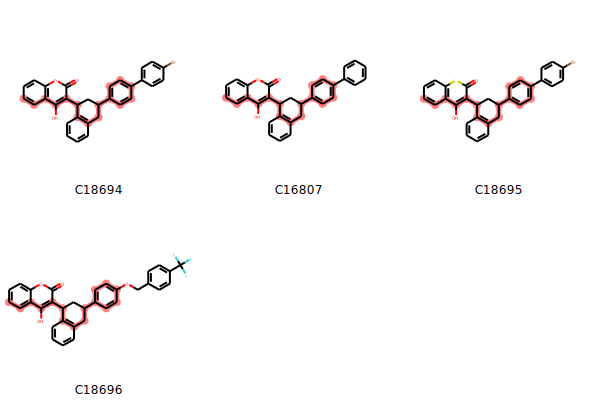

In [27]:
print(kcfmat.strs[35802])
kcfmat.draw_cpds(kcfstringidx=35802)

* The occurrances of the substructures in the respective compounds can be shown as below:

In [28]:
kcfmat.mat[:, 35802]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

* The users can also compare the distributions of the specified substructures in the binary classes. In the case shown below, the specified substructures have different distributions, which provides a help to classify herbicides from others.

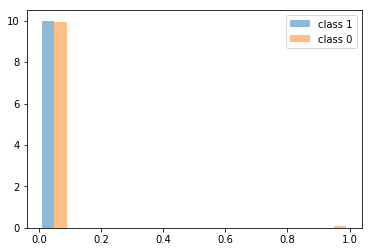

In [29]:
dist1 = []
dist2 = []
for x, y in zip(kcfmat.mat[:, 35802], classes):
    if y == 1:
        dist1.append(x)
    else:
        dist2.append(x)
plt.hist([dist1, dist2], alpha=0.5, normed=True, label=["class 1", "class 0"])
plt.legend()
plt.show()